In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import statsmodels.api as sm

In [292]:
df = pd.read_csv("./crypto_data.csv")

In [293]:
df.sample(5)

,Unnamed: 0,Date,Adj Close_BTC-USD,Adj Close_ETH-USD,Adj Close_SOL-USD,Volume_BTC-USD,Volume_ETH-USD,Volume_SOL-USD
538,538,2022-06-23 00:00:00+00:00,21085.876953,1143.386719,38.175232,26188097173,14657862919,1666479184
754,754,2023-01-25 00:00:00+00:00,23117.859375,1611.711060,24.571445,30685366709,10598973448,1166026842
49,49,2021-02-19 00:00:00+00:00,55888.132812,1960.164795,11.465653,63495496918,26268814253,261175711
1380,1380,2024-10-12 00:00:00+00:00,63193.023438,2476.523193,146.500290,16744110886,9372169184,1118630507
141,141,2021-05-22 00:00:00+00:00,37536.632812,2295.705566,31.315582,57377273240,42089937660,1078751751


In [294]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [295]:
df.sample(5)

,Date,Adj Close_BTC-USD,Adj Close_ETH-USD,Adj Close_SOL-USD,Volume_BTC-USD,Volume_ETH-USD,Volume_SOL-USD
528,2022-06-13 00:00:00+00:00,22487.388672,1204.582764,28.192362,68204556440,45162788786,2577135234
457,2022-04-03 00:00:00+00:00,46453.566406,3522.833496,136.775330,25414397610,15333808649,2585967812
33,2021-02-03 00:00:00+00:00,37472.089844,1660.909546,5.715990,61166818159,41874566399,49386327
339,2021-12-06 00:00:00+00:00,50582.625000,4358.737305,194.199219,37707308001,28229518513,3693853028
1074,2023-12-11 00:00:00+00:00,41243.832031,2224.578857,70.367172,40632672038,17989249470,3729540309


In [296]:
tickers = ['BTC-USD','ETH-USD','SOL-USD']

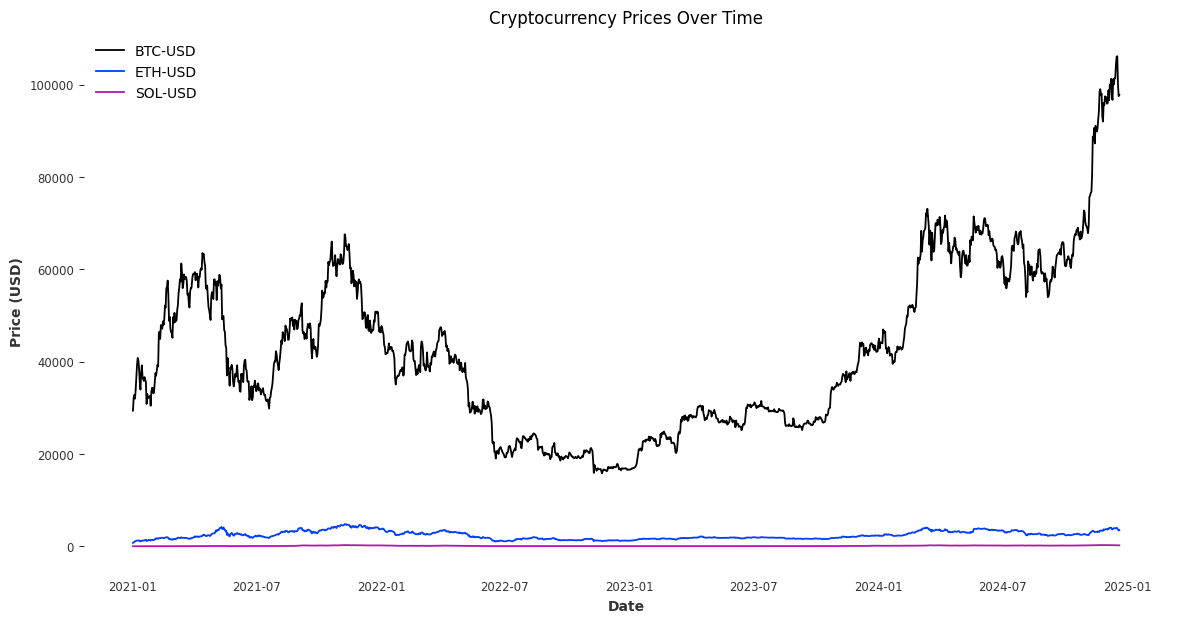

In [297]:
# Getting the close columns
close_columns = [i for i in df.columns if 'Close' in i]

# Formatting the date
df.Date = pd.to_datetime(df.Date)

# Plotting the three time series values
plt.figure(figsize=(14,7))
for ticker, close_col in zip(tickers,close_columns):
    plt.plot(df['Date'], df[close_col],label=ticker)

plt.title('Cryptocurrency Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

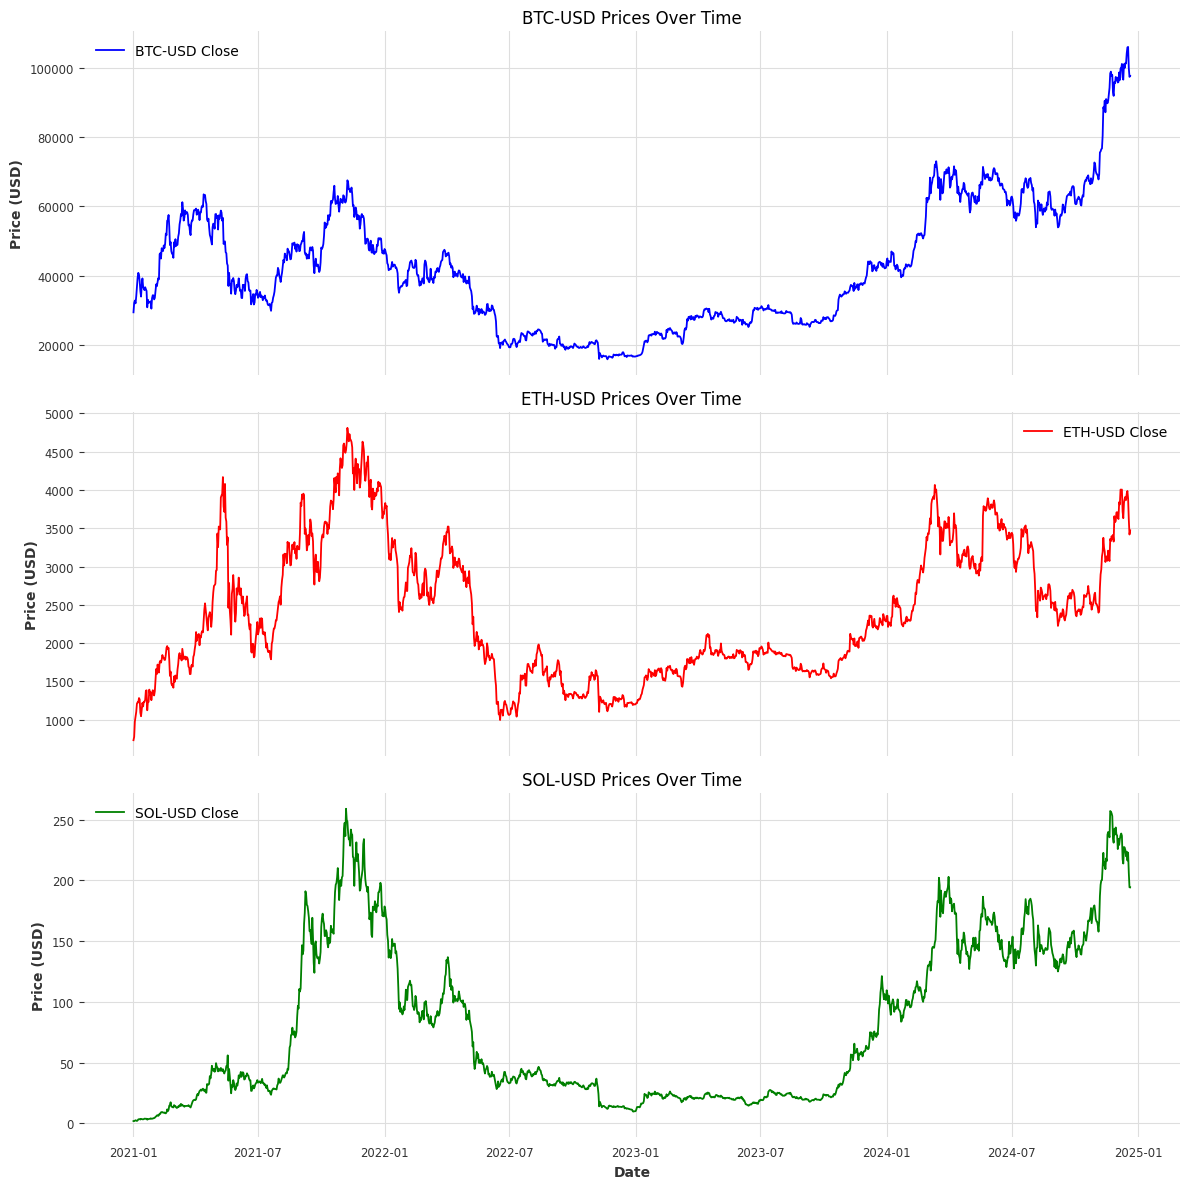

In [298]:
# Plotting the close values for the three currencies
colors = ['blue','red','green']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12), sharex=True)
for ax, ticker, close_col, col in zip(axes, tickers, close_columns, colors):
    ax.plot(df['Date'], df[close_col], label=f'{ticker} Close', color=col)
    ax.set_title(f'{ticker} Prices Over Time')
    ax.set_ylabel('Price (USD)')
    ax.legend()
    

plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [299]:
# Making a rolling average plot
df['BTC-rolling'] = df["Adj Close_BTC-USD"].rolling(window=30).mean()

In [300]:
def format_plot(fig, legends = None, xlabel="Time", ylabel="Value", figsize=(500,1000), font_size=15, title_font_size=20):
    if legends:
        names = cycle(legends)
        fig.for_each_trace(lambda t:  t.update(name = next(names)))
    fig.update_layout(
            autosize=False,
            width=figsize[1],
            height=figsize[0],
            title={
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
            titlefont={
                "size": 20
            },
            legend_title = None,
            legend=dict(
                font=dict(size=font_size),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                title_text=ylabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            ),
            xaxis=dict(
                title_text=xlabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            )
        )
    return fig

In [301]:
# Plotting the rolling average
fig = px.line(df, y="BTC-rolling", title="Rolling Monthly Average Adj Closed Price for BTC-USD",x='Date')
fig = format_plot(fig, ylabel="Energy Consumption")
fig.show()

In [302]:
# Seasonal Plots
ts_df = df.set_index('Date')

In [303]:
# Extracting the time variables
ts_df["weekday_name"] = ts_df.index.day_name()
ts_df["weekday"] = ts_df.index.weekday
ts_df["week"] = ts_df.index.isocalendar().week
ts_df["day"] = ts_df.index.day
ts_df["hour"] = ts_df.index.hour
ts_df["date"] = ts_df.index.date
ts_df["month"] = ts_df.index.month
ts_df["month_name"] = ts_df.index.month_name()
ts_df["year"] = ts_df.index.year
ts_df['quarter'] = ts_df.index.quarter

In [304]:
# Storing the monthly averages
plot_df = ts_df[ts_df.year.isin(range(2021,2025))].groupby(["year", "month_name"])[close_columns].mean().reset_index()

In [305]:
plot_df

,year,month_name,Adj Close_BTC-USD,Adj Close_ETH-USD,Adj Close_SOL-USD
0,2021,April,57206.720052,2297.672754,31.331174
1,2021,August,45709.022681,3098.384939,60.815578
2,2021,December,49263.209173,4044.742479,185.125281
3,2021,February,46306.798968,1699.808921,9.635357
4,2021,January,34761.649950,1202.502802,3.260222
5,2021,July,34444.973790,2131.080362,30.399264
6,2021,June,35845.154687,2335.792391,35.713352
7,2021,March,54998.008695,1736.862222,14.850674
8,2021,May,46443.286668,3140.730760,39.886821
9,2021,November,60621.488802,4434.128711,223.878649


In [306]:
fig = make_subplots(rows=3, cols=1)

fig1 = px.line(plot_df,x='month_name',y=close_columns[0],color='year',line_dash="year", title="Seasonal Plot - Monthly")

for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
    
fig2 = px.line(plot_df,x='month_name',y=close_columns[1],color='year',line_dash="year", title="Seasonal Plot - Monthly")

for trace in fig2.data:
    trace.showlegend = False
    fig.add_trace(trace, row=2, col=1)

fig3 = px.line(plot_df,x='month_name',y=close_columns[2],color='year',line_dash="year", title="Seasonal Plot - Monthly")

for trace in fig3.data:
    trace.showlegend = False
    fig.add_trace(trace, row=3, col=1)
fig.update_layout(height=600, width=1000, title_text="Seasonal Plots for BTC, ETH and SOL")
fig.show()

In [307]:
# Seasonal box plot
plot_df =  ts_df.groupby(["date","weekday_name", "month"])[close_columns[0]].mean().reset_index().dropna()

In [308]:
plot_df

,date,weekday_name,month,Adj Close_BTC-USD
0,2021-01-01,Friday,1,29374.152344
1,2021-01-02,Saturday,1,32127.267578
2,2021-01-03,Sunday,1,32782.023438
3,2021-01-04,Monday,1,31971.914062
4,2021-01-05,Tuesday,1,33992.429688
...,...,...,...,...
1445,2024-12-16,Monday,12,106029.718750
1446,2024-12-17,Tuesday,12,106140.601562
1447,2024-12-18,Wednesday,12,100041.539062
1448,2024-12-19,Thursday,12,97490.953125


In [309]:
fig = px.box(plot_df, y=close_columns[0], x="month", log_y=True, title="Box Plot: Day of Month-Hourly Average")
fig = format_plot(fig, ylabel="Energy Consumption", xlabel="Months", legends=None)
fig.show()

In [310]:
def plot_seasonal_box_plot(seasonality, data, column):
    seasonal_dict = {
        1 : ['day','Days'],
        7 : ['week','Weeks'],
        30 : ['month','Months'],
        4 : ['quarter','Quarters']
    }
    plot_df =  data.groupby(["date","weekday_name", seasonal_dict[seasonality][0]])[column].mean().reset_index().dropna()
    fig = px.box(plot_df, y=close_columns[0], x=seasonal_dict[seasonality][0], log_y=True, title=f"Box Plot: {seasonal_dict[seasonality][1]} of {column}")
    fig = format_plot(fig, ylabel="Energy Consumption", xlabel=seasonal_dict[seasonality][1], legends=None)
    fig.show()

In [311]:
plot_seasonal_box_plot(4,ts_df,close_columns[0])

In [312]:
plot_seasonal_box_plot(1,ts_df,close_columns[0])

In [313]:
plot_seasonal_box_plot(7,ts_df,close_columns[0])

In [314]:
plot_seasonal_box_plot(30,ts_df,close_columns[0])

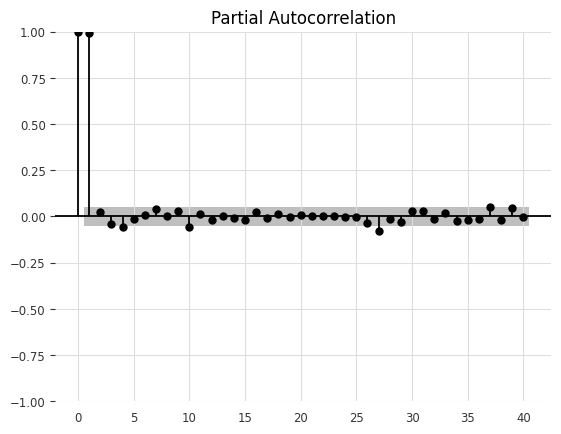

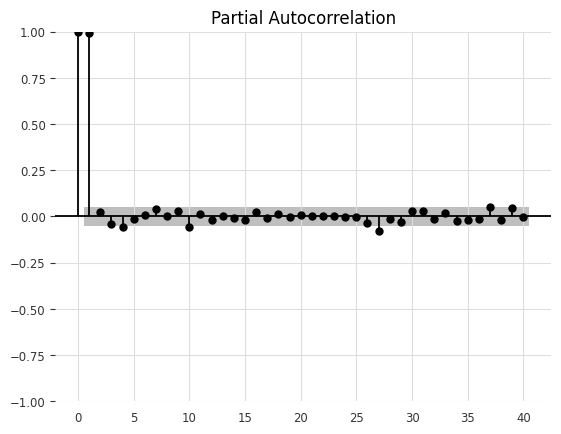

In [315]:
# Plotting autocorrelation plots
sm.graphics.tsa.plot_pacf(ts_df[close_columns[0]], lags=40, method="ywm")

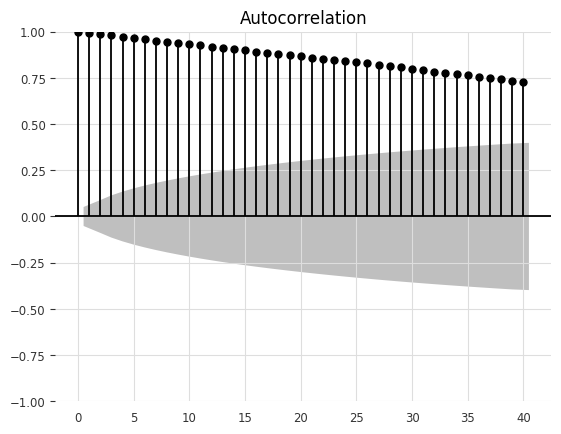

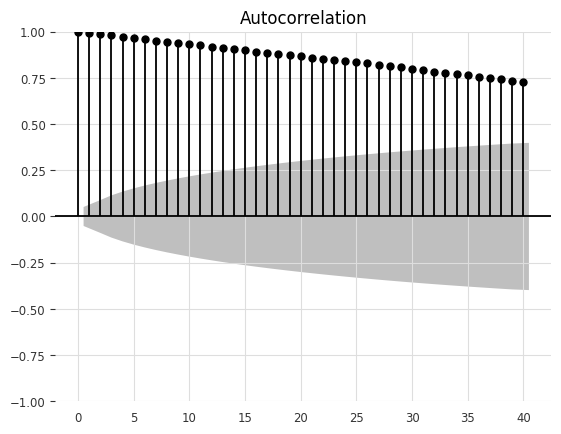

In [316]:
sm.graphics.tsa.plot_acf(ts_df[close_columns[0]], lags=40)

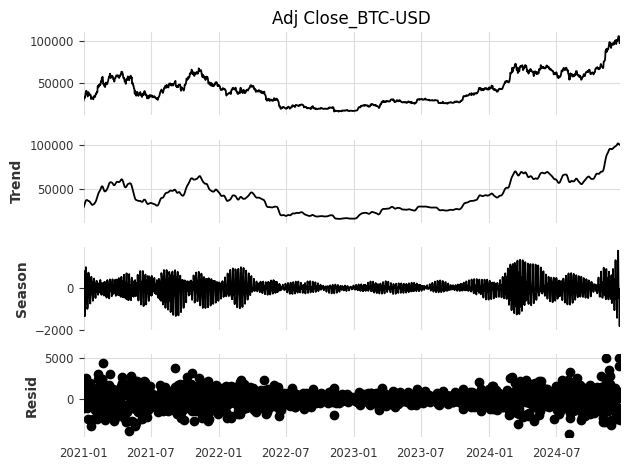

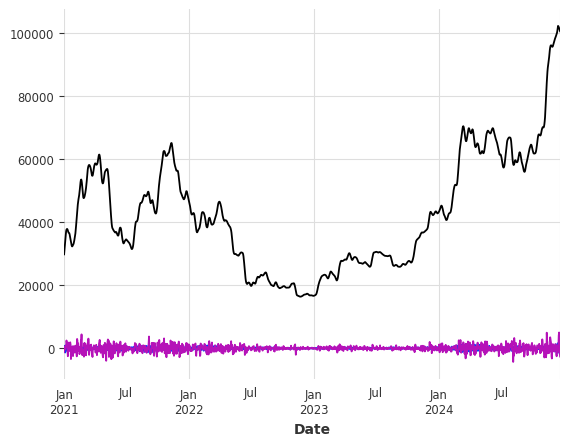

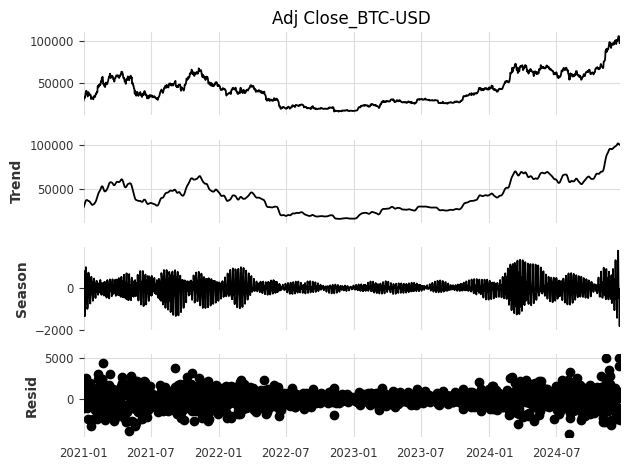

In [317]:
from statsmodels.tsa.seasonal import STL

series = ts_df[close_columns[0]]
stl = STL(series, seasonal=13)  
result = stl.fit()

# Access the components
result.trend.plot()
result.seasonal.plot()
result.resid.plot()
result.plot() 

### Modeling

We look to model the data using various methods
1. ARIMA, SARIMA, SARIMAX + GARCH
2. Machine Learning Methods
3. Deep Learning Methods

The metrics we use for forecasting are
1. MAE
2. MSE
3. MASE
4. Forecast Bias

In [318]:
from darts import TimeSeries
from darts.models import (
    NaiveSeasonal,
    NaiveMean,
    NaiveDrift,
    ExponentialSmoothing,
    AutoARIMA,
    ARIMA,
    Theta,
    FFT
)

from darts.metrics import mase, mse, mae, ope

In [319]:
def eval_model(model, ts_train, ts_test, name=None):
    if name is None:
        name = type(model).__name__
    model.fit(ts_train)
    y_pred = model.predict(len(ts_test))
    return y_pred, {
        "Algorithm": name,
        "MAE": mae(actual_series = ts_test, pred_series = y_pred),
        "MSE": mse(actual_series = ts_test, pred_series = y_pred),
        "MASE": mase(actual_series = ts_test, pred_series = y_pred, insample=ts_train)
    }

def format_y_pred(y_pred, name):
    y_pred = y_pred.data_array().to_series()
    y_pred.index = y_pred.index.get_level_values(0)
    y_pred.name = name
    return y_pred

In [320]:
# The series we look to model
price_df = ts_df[['Adj Close_BTC-USD']]
price_df.sample(5)

,Adj Close_BTC-USD
Date,
2024-12-19 00:00:00+00:00,97490.953125
2024-06-30 00:00:00+00:00,62678.292969
2023-03-01 00:00:00+00:00,23646.550781
2023-01-21 00:00:00+00:00,22777.625000
2021-05-15 00:00:00+00:00,46760.187500


In [321]:
price_df.rename(columns={'Adj Close_BTC-USD' : 'Price'},inplace=True)

C:\Users\sahak\AppData\Local\Temp\ipykernel_12184\2496584496.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [322]:
def split_data(price_df, test_size = 30, val_size = 30):

    # Determine the split indices
    test_start_idx = len(price_df) - test_size
    val_start_idx = test_start_idx - val_size
    
    # Create train, validation, and test sets
    train_data = price_df.iloc[:val_start_idx]
    val_data = price_df.iloc[val_start_idx:test_start_idx]
    test_data = price_df.iloc[test_start_idx:]

    return train_data, val_data, test_data

In [323]:
ts_train, ts_val, ts_test = split_data(price_df)

In [324]:
from statsmodels.tsa.stattools import adfuller

def dftest(data, threshold = 0.05):
    # Perform Augmented Dickey-Fuller test
    result = adfuller(data)
    
    # Extract test results
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    
    # Interpretation
    if result[1] <= threshold:
        print("The time series is stationary (reject the null hypothesis).")
    else:
        print("The time series is non-stationary (fail to reject the null hypothesis).")

In [325]:
def format_plot(fig, legends = None, xlabel="Time", ylabel="Value", title="", font_size=15):
    if legends:
        names = cycle(legends)
        fig.for_each_trace(lambda t:  t.update(name = next(names)))
    fig.update_layout(
            autosize=False,
            width=900,
            height=500,
            title_text=title,
            title={
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
            titlefont={
                "size": 20
            },
            legend_title = None,
            legend=dict(
                font=dict(size=font_size),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                title_text=ylabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            ),
            xaxis=dict(
                title_text=xlabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            )
        )
    return fig

In [326]:
from itertools import cycle
def plot_forecast(pred_df, forecast_columns, forecast_display_names=None):
    if forecast_display_names is None:
        forecast_display_names = forecast_columns
    else:
        assert len(forecast_columns)==len(forecast_display_names)
    mask = ~pred_df[forecast_columns[0]].isnull()
    # colors = ["rgba("+",".join([str(c) for c in plotting_utils.hex_to_rgb(c)])+",<alpha>)" for c in px.colors.qualitative.Plotly]
    colors = [c.replace("rgb", "rgba").replace(")", ", <alpha>)") for c in px.colors.qualitative.Dark2]
    # colors = [c.replace("rgb", "rgba").replace(")", ", <alpha>)") for c in px.colors.qualitative.Safe]
    act_color = colors[0]
    colors = cycle(colors[1:])
    dash_types = cycle(["dash","dot","dashdot"])
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=pred_df[mask].index, y=pred_df[mask].Price,
                        mode='lines', line = dict(color=act_color.replace("<alpha>", "0.3")),
                        name='Actual Price'))
    for col, display_col in zip(forecast_columns,forecast_display_names):
        fig.add_trace(go.Scatter(x=pred_df[mask].index, y=pred_df.loc[mask, col],
                            mode='lines', line = dict(dash=next(dash_types), color=next(colors).replace("<alpha>", "1")),
                            name=display_col))
    return fig

### Baseline Forecasts

In [327]:
pred_df = pd.concat([ts_train, ts_val])
metric_record = []

ts_train = TimeSeries.from_series(ts_train)
ts_val = TimeSeries.from_series(ts_val)
ts_test = TimeSeries.from_series(ts_test)

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.
The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.
The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the 

### Naive Forecast

In [328]:
name = "Naive"
naive_model = NaiveSeasonal(K=1)
y_pred, metrics = eval_model(naive_model, ts_train, ts_val, name=name)
metric_record.append(metrics)
y_pred = format_y_pred(y_pred, "naive_predictions")
pred_df.index = pred_df.index.tz_localize(None)
pred_df = pred_df.join(y_pred)

In [329]:
fig = plot_forecast(pred_df, forecast_columns=["naive_predictions"], forecast_display_names=['Naive Predictions'])
fig = format_plot(fig, title=f"Naive: MAE: {metrics['MAE']:.4f} | MSE: {metrics['MSE']:.4f} | MASE: {metrics['MASE']:.4f} ")
fig.show()

### Exponential Smoothing

In [330]:
from darts.utils.utils import ModelMode, SeasonalityMode

In [331]:
name = "Exponential Smoothing"

ets_model = ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=True, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=365, random_state=42)
y_pred, metrics = eval_model(ets_model, ts_train, ts_val, name=name)
metric_record.append(metrics)
y_pred = format_y_pred(y_pred, "ets_predictions")
pred_df = pred_df.join(y_pred)

C:\Users\sahak\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [332]:
fig = plot_forecast(pred_df, forecast_columns=["ets_predictions"], forecast_display_names=['Exponential Smoothing Predictions'])
fig = format_plot(fig, title=f"Exponential Smoothing: MAE: {metrics['MAE']:.4f} | MSE: {metrics['MSE']:.4f} | MASE: {metrics['MASE']:.4f}")
fig.show()

### ARIMA

In [333]:
name = "ARIMA"
arima_model = AutoARIMA(max_p=5, max_q=3, seasonal=False)
y_pred, metrics = eval_model(arima_model, ts_train, ts_val,  name=name)
metric_record.append(metrics)
y_pred = format_y_pred(y_pred, "arima_predictions")
pred_df = pred_df.join(y_pred)

In [334]:
fig = plot_forecast(pred_df, forecast_columns=["arima_predictions"], forecast_display_names=['ARIMA Predictions'])
fig = format_plot(fig, title=f"ARIMA: MAE: {metrics['MAE']:.4f} | MSE: {metrics['MSE']:.4f} | MASE: {metrics['MASE']:.4f}")
fig.show()

### ARIMA + GARCH

In [335]:
ts_train, ts_val, ts_test = split_data(price_df)

In [336]:
def calc_mae(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

def calc_mse(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mse = np.mean(np.power(y_true-y_pred,2))
    return mse
    
def calc_mase(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
       
    mae = np.mean(np.abs(y_true - y_pred))
    
    naive_forecast = y_true[:-1]
    naive_actual = y_true[1:]
    mae_naive = np.mean(np.abs(naive_actual - naive_forecast))
    
    mase = mae / mae_naive if mae_naive != 0 else np.inf
    return mase

In [337]:
# Arima modelling the mean
import pmdarima
X = ts_train['Price']
arima_model_fitted = pmdarima.auto_arima(X)

y_pred = arima_model_fitted.predict(len(ts_val))

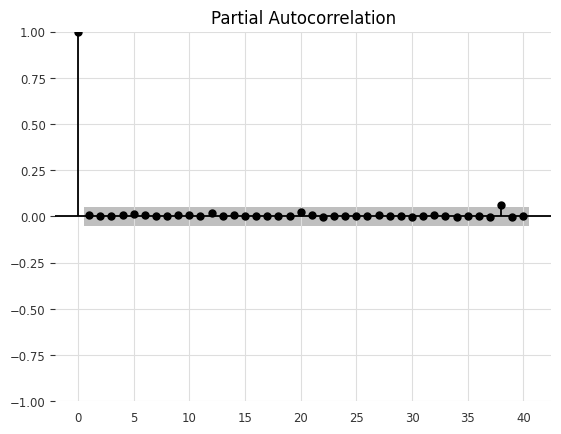

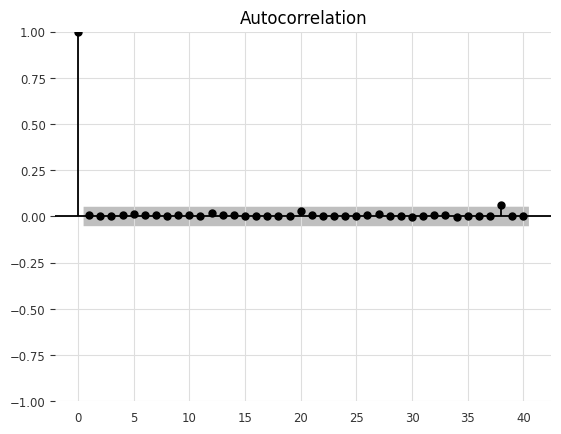

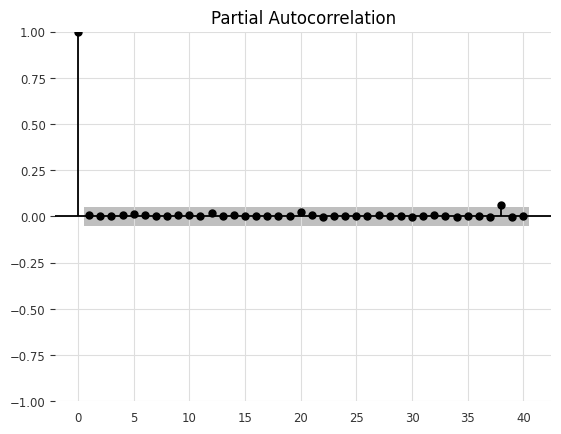

In [338]:
# Modeling the heteroscedasticity
resids = arima_model_fitted.arima_res_.resid

sm.graphics.tsa.plot_acf(resids ** 2, lags=40)
sm.graphics.tsa.plot_pacf(resids ** 2, lags=40)

In [339]:
import arch

garch = arch.arch_model(resids, vol='GARCH',p=1, q=1)
garch_fitted = garch.fit()
garch_forecast = garch_fitted.forecast(horizon=len(ts_val))
garch_volatility = np.sqrt(garch_forecast.variance.values[-1, :])

combined_forecast = y_pred + garch_volatility

Iteration:      1,   Func. Count:      6,   Neg. LLF: 43565.404352247395
Iteration:      2,   Func. Count:     13,   Neg. LLF: 11840.610869830878
Iteration:      3,   Func. Count:     19,   Neg. LLF: 11831.81370711917
Iteration:      4,   Func. Count:     25,   Neg. LLF: 11829.0383535773
Iteration:      5,   Func. Count:     31,   Neg. LLF: 11826.37158298422
Iteration:      6,   Func. Count:     36,   Neg. LLF: 11826.37048850581
Iteration:      7,   Func. Count:     41,   Neg. LLF: 11826.36503344838
Iteration:      8,   Func. Count:     46,   Neg. LLF: 11826.338558106809
Iteration:      9,   Func. Count:     51,   Neg. LLF: 11826.228280160558
Iteration:     10,   Func. Count:     56,   Neg. LLF: 11826.050992545164
Iteration:     11,   Func. Count:     61,   Neg. LLF: 11826.050935512289
Iteration:     12,   Func. Count:     66,   Neg. LLF: 11826.050932665676
Iteration:     13,   Func. Count:     70,   Neg. LLF: 11826.050932665818
Optimization terminated successfully    (Exit mode 0)
   

C:\Users\sahak\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.567e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




In [340]:
metrics = {
        "Algorithm": "ARIMA + GARCH",
        "MAE": calc_mae(ts_test,y_pred),
        "MSE": calc_mse(ts_test, y_pred),
        "MASE": calc_mase(ts_test, y_pred,)
    }
metric_record.append(metrics)


In [341]:
combined_forecast.index.get_level_values(0)

DatetimeIndex(['2024-10-22 00:00:00+00:00', '2024-10-23 00:00:00+00:00',
               '2024-10-24 00:00:00+00:00', '2024-10-25 00:00:00+00:00',
               '2024-10-26 00:00:00+00:00', '2024-10-27 00:00:00+00:00',
               '2024-10-28 00:00:00+00:00', '2024-10-29 00:00:00+00:00',
               '2024-10-30 00:00:00+00:00', '2024-10-31 00:00:00+00:00',
               '2024-11-01 00:00:00+00:00', '2024-11-02 00:00:00+00:00',
               '2024-11-03 00:00:00+00:00', '2024-11-04 00:00:00+00:00',
               '2024-11-05 00:00:00+00:00', '2024-11-06 00:00:00+00:00',
               '2024-11-07 00:00:00+00:00', '2024-11-08 00:00:00+00:00',
               '2024-11-09 00:00:00+00:00', '2024-11-10 00:00:00+00:00',
               '2024-11-11 00:00:00+00:00', '2024-11-12 00:00:00+00:00',
               '2024-11-13 00:00:00+00:00', '2024-11-14 00:00:00+00:00',
               '2024-11-15 00:00:00+00:00', '2024-11-16 00:00:00+00:00',
               '2024-11-17 00:00:00+00:00', '2024-1

In [342]:
combined_forecast.index = combined_forecast.index.get_level_values(0)
combined_forecast.name = "arima_garch_predictions"

In [343]:
combined_forecast.index = combined_forecast.index.tz_localize(None)

In [344]:
pred_df = pred_df.join(combined_forecast)

In [345]:
pred_df

,Price,naive_predictions,ets_predictions,arima_predictions,arima_garch_predictions
Date,,,,,
2021-01-01,29374.152344,NaN,NaN,NaN,NaN
2021-01-02,32127.267578,NaN,NaN,NaN,NaN
2021-01-03,32782.023438,NaN,NaN,NaN,NaN
2021-01-04,31971.914062,NaN,NaN,NaN,NaN
2021-01-05,33992.429688,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-11-16,90558.476562,67367.851562,66867.988615,67367.851562,68804.136925
2024-11-17,89845.851562,67367.851562,65174.139352,67367.851562,68809.285700
2024-11-18,90542.640625,67367.851562,65788.269196,67367.851562,68814.325485


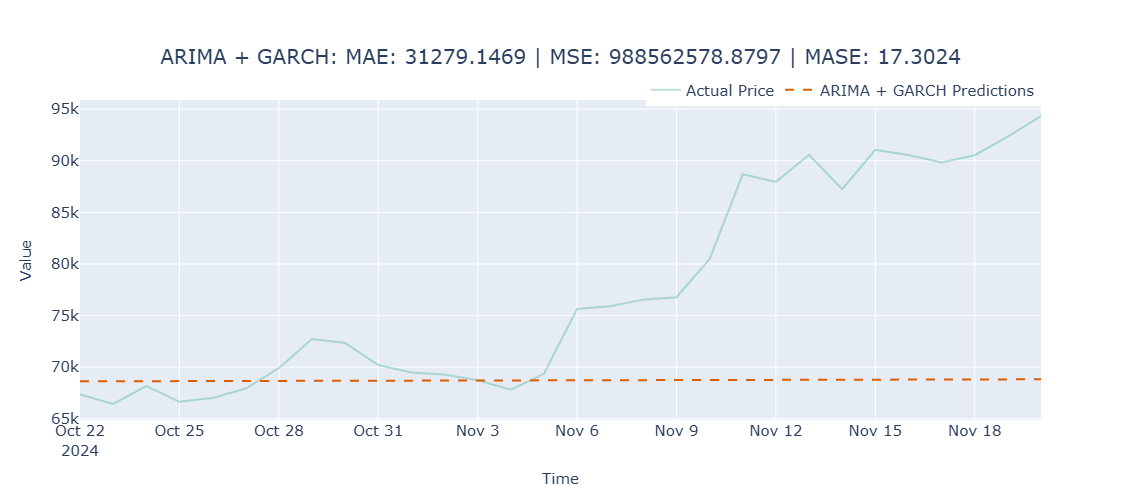

In [346]:
fig = plot_forecast(pred_df, forecast_columns=["arima_garch_predictions"], forecast_display_names=['ARIMA + GARCH Predictions'])
fig = format_plot(fig, title=f"ARIMA + GARCH: MAE: {metrics['MAE']:.4f} | MSE: {metrics['MSE']:.4f} | MASE: {metrics['MASE']:.4f}")
fig.show()

In [348]:
metric

NameError: name 'metric' is not defined